import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
points = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/coord.csv")

In [3]:
points.head()

,LAT,LONG
0,49.987000,142.157883
1,49.964722,143.263031
2,49.822498,142.154556
3,49.770195,144.087326
4,49.668335,144.100281


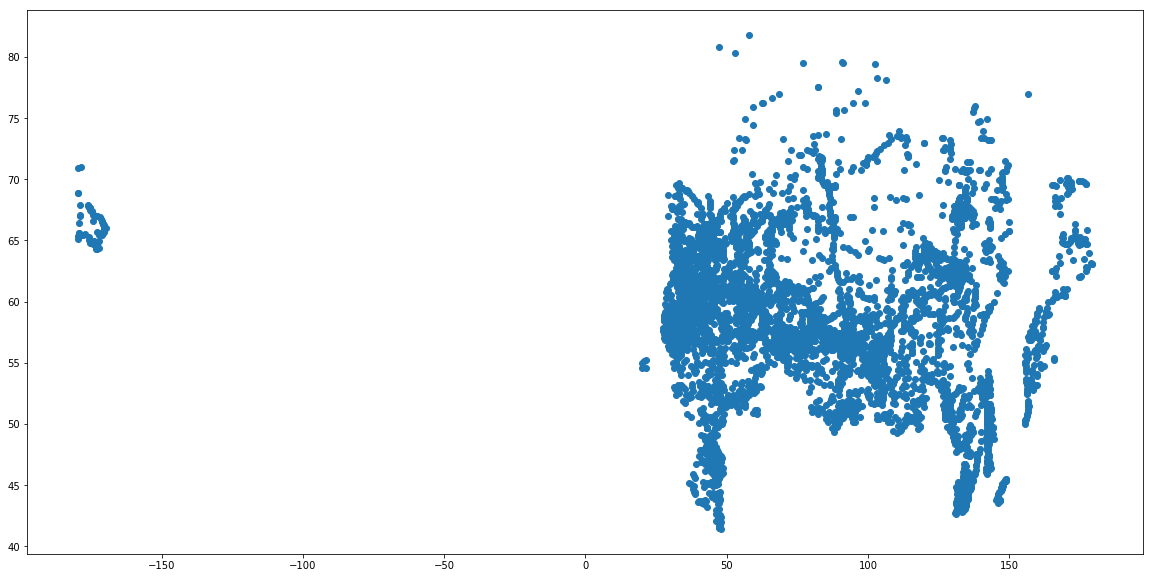

In [4]:
plt.figure(figsize=(20,10))
plt.scatter(points["LONG"],points["LAT"])

In [5]:
from sklearn.metrics import pairwise_distances


In [6]:
class KMeans:
    def __init__(self,n_clusters,max_iter=100, show=False):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.show = show
        
    def fit_transform(self,X):
        n_samples = X.shape[0]
        n_features = X.shape[1]
        clusters = np.random.randint(0, self.n_clusters,size=n_samples)
        self.centers = np.zeros((self.n_clusters,n_features))
        
        if self.show:
            plt.figure(figsize=(20,10))
            plt.scatter(X[:,1],X[:,0],c=clusters) 
            plt.show()
        
        for it in range(self.max_iter):
            for c in range(self.n_clusters):
                self.centers[c] = X[clusters == c].mean(axis=0)
            
            distances = pairwise_distances(X,self.centers)
            clusters = np.argmin(distances,axis=1)
        
            if self.show:
                plt.figure(figsize=(20,10))
                plt.scatter(X[:,1],X[:,0],c=clusters) 
                plt.show()
        
        return clusters
        

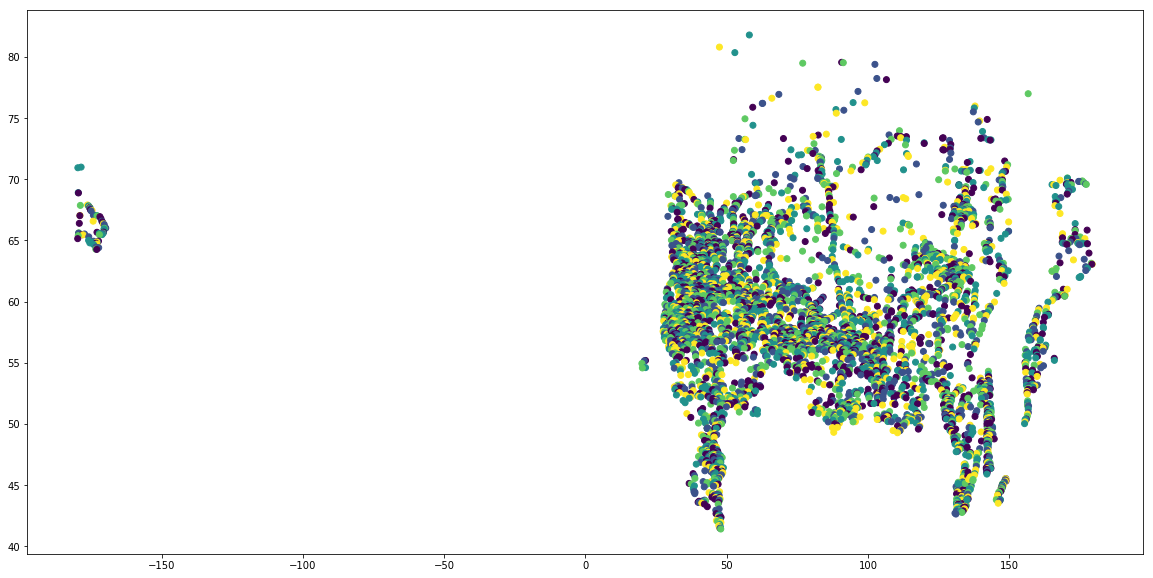

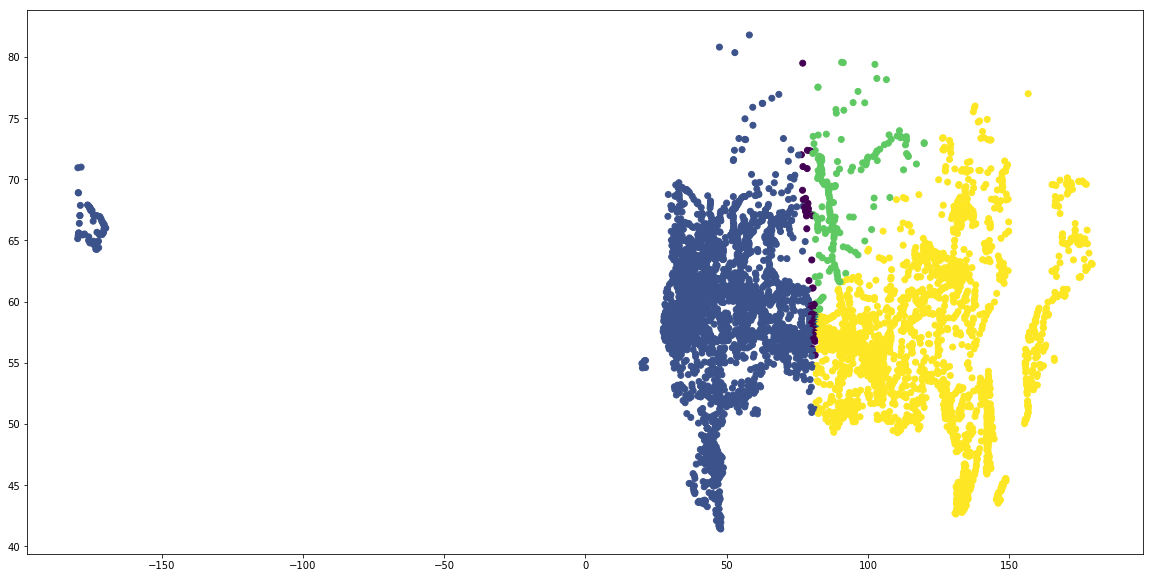

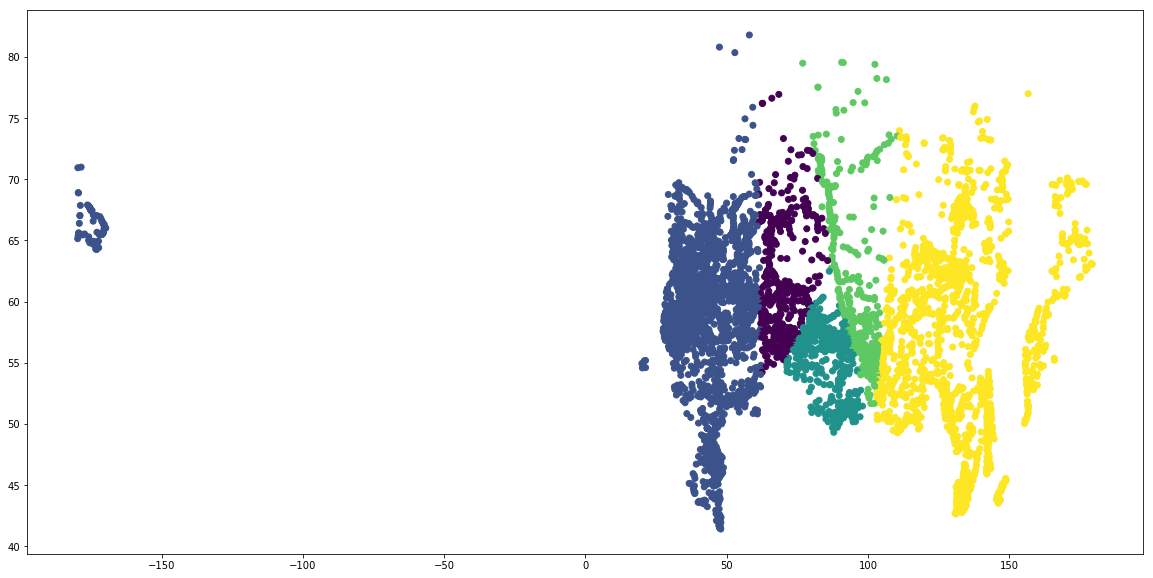

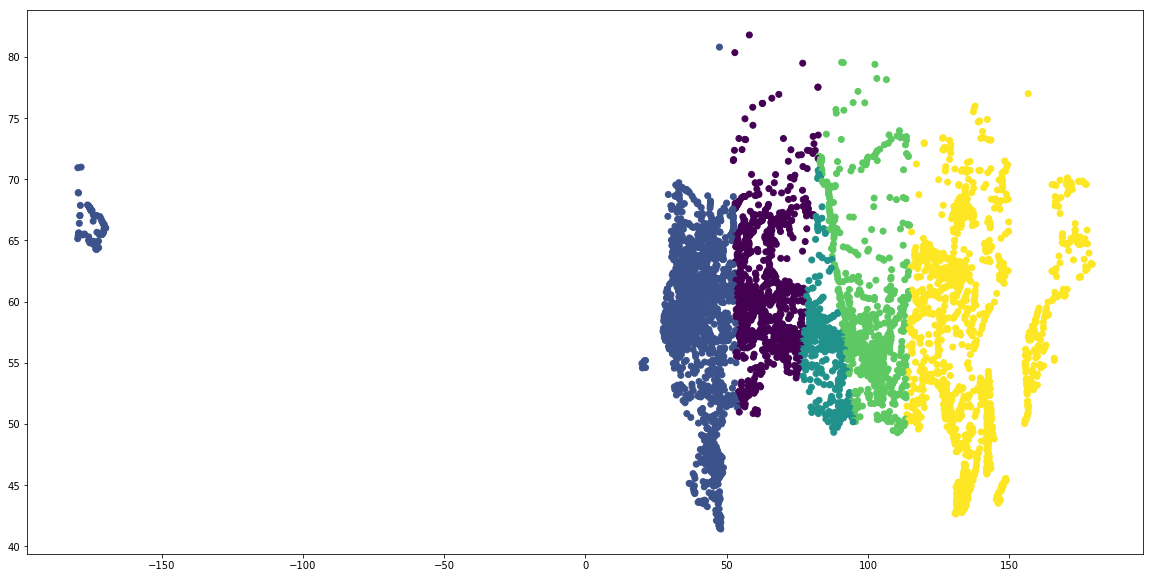

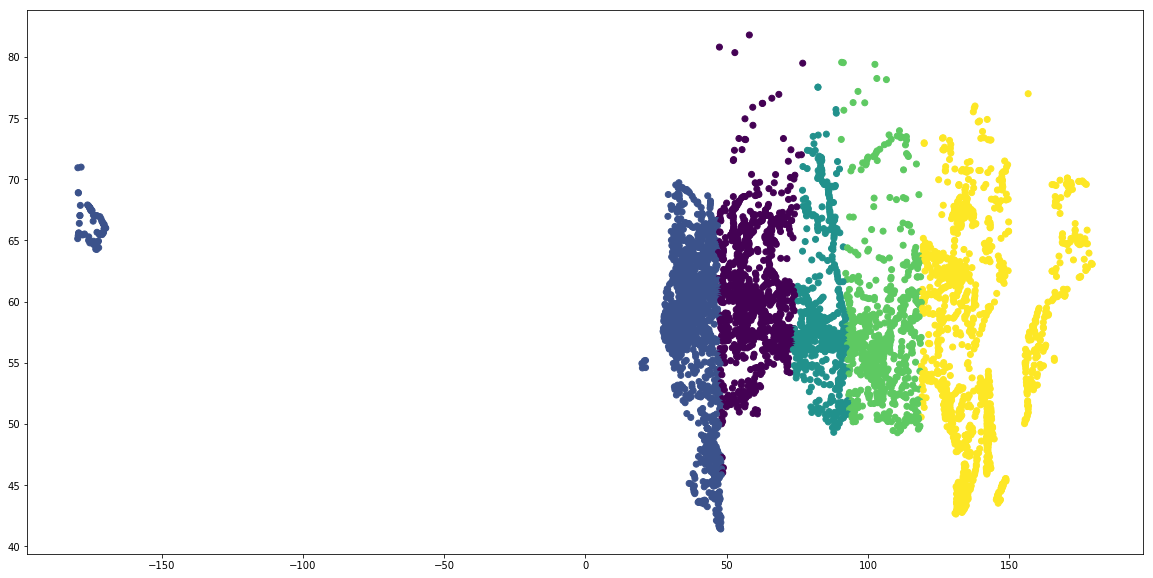

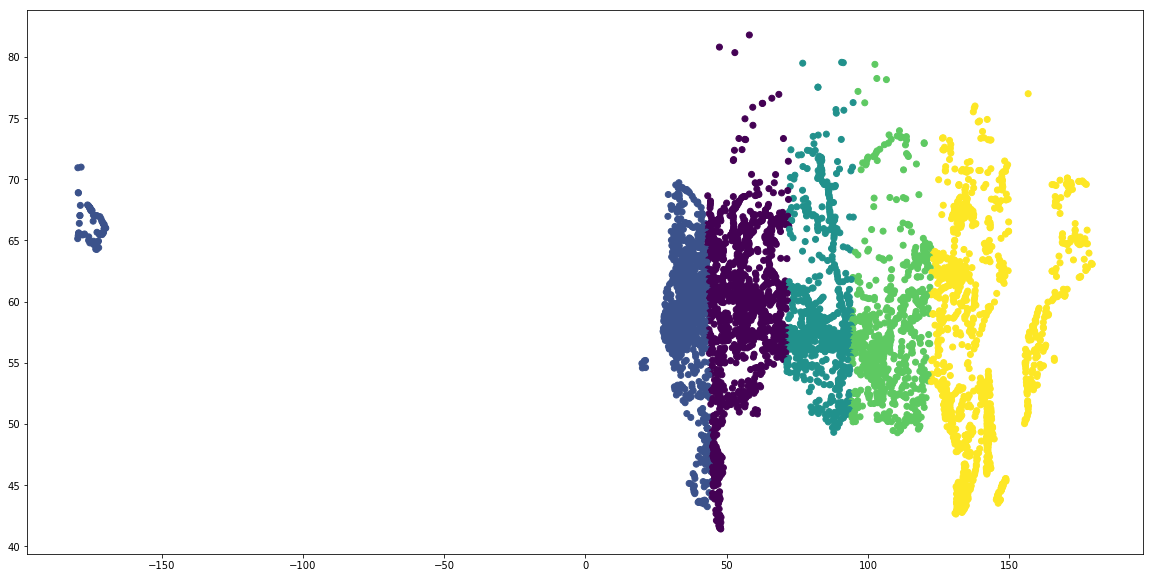

In [7]:
k_means = KMeans(5,max_iter=5,show=True)
clusters = k_means.fit_transform(points.values)

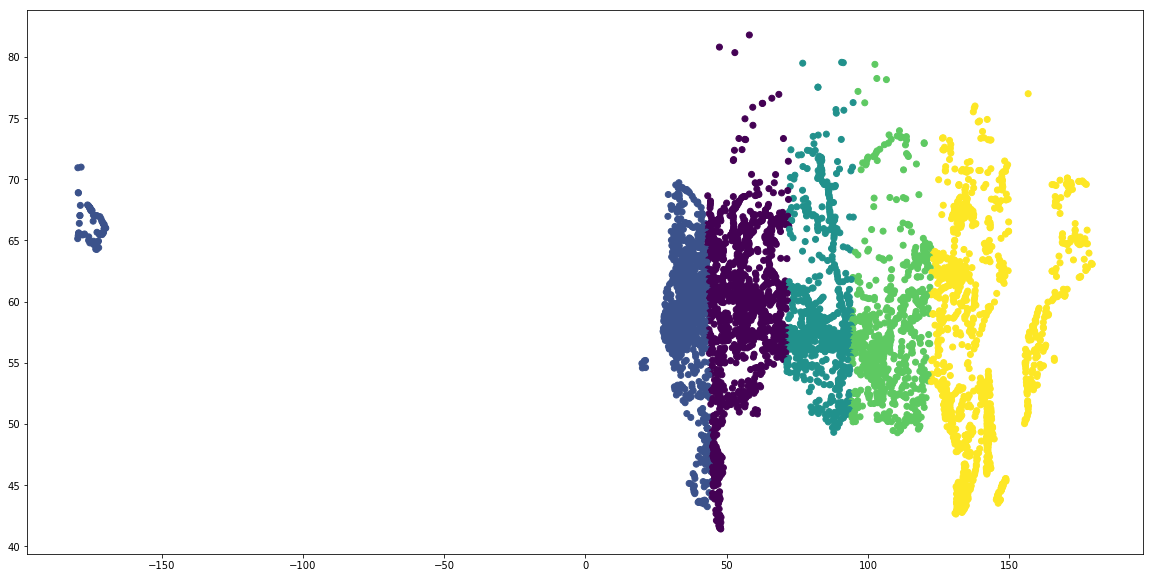

In [8]:
plt.figure(figsize=(20,10))
plt.scatter(points["LONG"],points["LAT"],c=clusters)

(237, 316, 3)

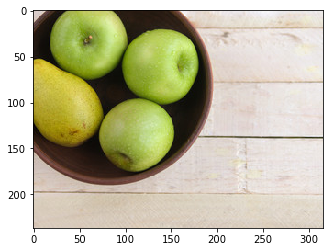

In [9]:
img = plt.imread("https://raw.githubusercontent.com/iad34/seminars/master/materials/apple.png")
plt.imshow(img)
img.shape

In [10]:
two_dim_img = img.reshape(-1,3)
k_means = KMeans(3)
clusters = k_means.fit_transform(two_dim_img)

In [15]:
clusters[::100]

array([2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 0, 2, 2, 0, 2, 2,
       1, 2, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 0, 2, 0, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0,
       2, 1, 1, 2, 1, 1, 2, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1, 0, 2, 1, 1, 2,
       1, 1, 2, 1, 1, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 2, 1, 1, 2, 1,
       1, 2, 0, 1, 2, 2, 1, 2, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 0, 1,
       2, 2, 1, 2, 2, 1, 0, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 1, 2,
       2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 2, 2, 1, 0, 2,
       1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1,
       1, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 2, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2,
       1, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1,
       0, 2, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 2, 0,
       2, 2,

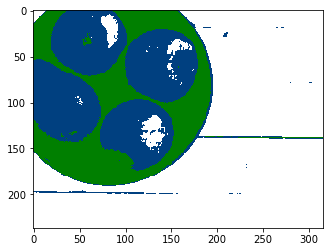

In [11]:
plt.imshow(clusters.reshape(img.shape[:2]),cmap="ocean")

In [12]:
import seaborn

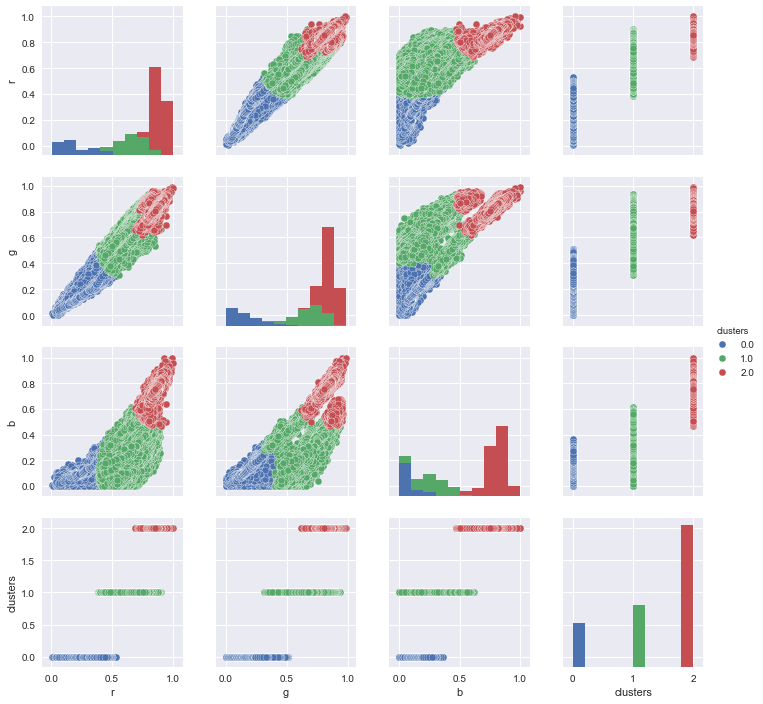

In [13]:
apples = pd.DataFrame(data=np.hstack((two_dim_img,clusters[:,np.newaxis])),columns=["r","g","b","clusters"])
seaborn.pairplot(apples, hue="clusters")

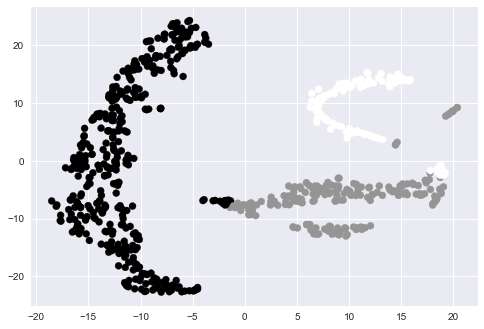

In [14]:
from sklearn.manifold import TSNE
tsne = TSNE(2)
data = tsne.fit_transform(two_dim_img[::100])
plt.scatter(data[:,0],data[:,1],c=clusters[::100])